In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from utils import build_and_run

In [3]:
%%writefile src/MMult_0.cpp
#include "parameters.hpp"

#if defined(OLD_MMult_0)
#define FUNC_NAME OLD_MMult
#elif defined(NEW_MMult_0)
#define FUNC_NAME NEW_MMult
#endif

void FUNC_NAME(int m, int n, int k, double *a, int lda,
               double *b, int ldb,
               double *c, int ldc)
{
    int i, j, p;

    for (j = 0; j < n; j++)
    {
        for (i = 0; i < m; i++)
        {
            for (p = 0; p < k; p++)
            {
                C(i, j) = C(i, j) + A(i, p) * B(p, j);
            }
        }
    }
}

Overwriting src/MMult_0.cpp


In [4]:
%%writefile src/MMult_1.cpp
#include "parameters.hpp"

#if defined(OLD_MMult_1)
#define FUNC_NAME OLD_MMult
#elif defined(NEW_MMult_1)
#define FUNC_NAME NEW_MMult
#endif

void AddDot(int, double *, double *, int, double *);

void FUNC_NAME(int m, int n, int k, double *a, int lda,
               double *b, int ldb,
               double *c, int ldc)
{
    int i, j;

    for (i = 0; i < m; i += 1)
    {
        for (j = 0; j < n; j += 1)
        {
            AddDot(k, &A(i, 0), &B(0, j), ldb, &C(i, j));
        }
    }
}

#define Y(i) y[(i)*incx]

void AddDot(int k, double *x, double *y, int incx, double *gamma)
{
    int p;
    for (p = 0; p < k; p++)
    {
        *gamma += x[p] * Y(p);
    }
}

Overwriting src/MMult_1.cpp


m=40, n=40, k=40, time_consumption(old)=0.000235, time_consumption(new)=0.0002315, diff=0
m=80, n=80, k=80, time_consumption(old)=0.001738, time_consumption(new)=0.001342, diff=0
m=120, n=120, k=120, time_consumption(old)=0.0042605, time_consumption(new)=0.0045995, diff=0
m=160, n=160, k=160, time_consumption(old)=0.0130615, time_consumption(new)=0.012822, diff=0
m=200, n=200, k=200, time_consumption(old)=0.020168, time_consumption(new)=0.0211505, diff=0
m=240, n=240, k=240, time_consumption(old)=0.0358765, time_consumption(new)=0.040216, diff=0
m=280, n=280, k=280, time_consumption(old)=0.064353, time_consumption(new)=0.075185, diff=0
m=320, n=320, k=320, time_consumption(old)=0.234819, time_consumption(new)=0.213677, diff=0
m=360, n=360, k=360, time_consumption(old)=0.162094, time_consumption(new)=0.168689, diff=0
m=400, n=400, k=400, time_consumption(old)=0.268299, time_consumption(new)=0.283967, diff=0
m=440, n=440, k=440, time_consumption(old)=0.328716, time_consumption(new)=0.358

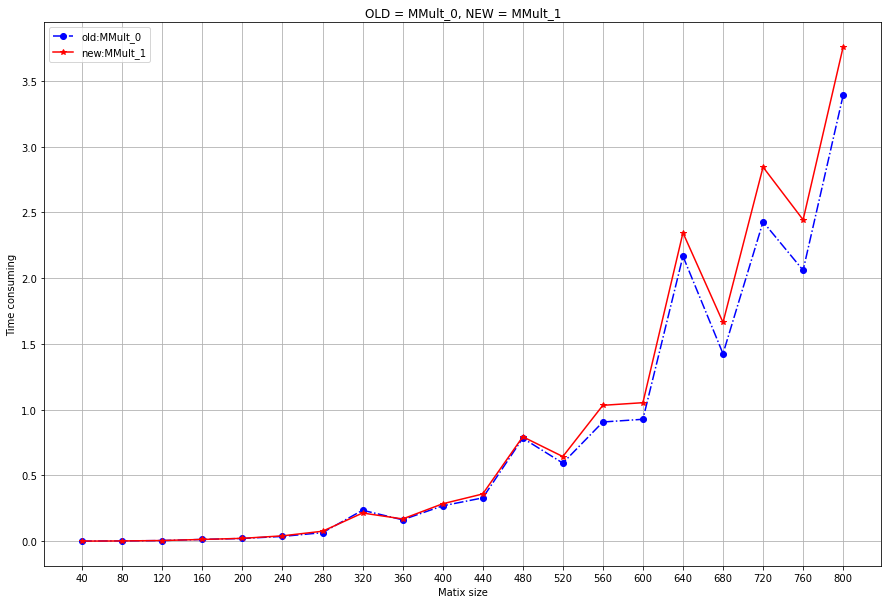

In [5]:
build_and_run("MMult_0", "MMult_1")